In [5]:
using ArraySignalProcessing
pa = IsotropicArray(-6e-2, -2e-2, 2e-2, 6e-2)

# Use the array below to better see the behaviour
#pa = IsotropicArray(Vector(LinRange(-20e-2, 20e-2, 16)))

# Diagonal loading is applied by adding whitenoise to the correlation matrix
Snn = diffnoise(pa, 1e3, 3.75e9) + whitenoise(pa, 1e-2)
weights = mvdr_weights(pa, Snn, deg2rad(110), 3.75e9)
faxis = LinRange(3.7e9, 3.8e9, 1024)

1024-element LinRange{Float64, Int64}:
 3.7e9, 3.7001e9, 3.7002e9, 3.70029e9, …, 3.7998e9, 3.7999e9, 3.8e9

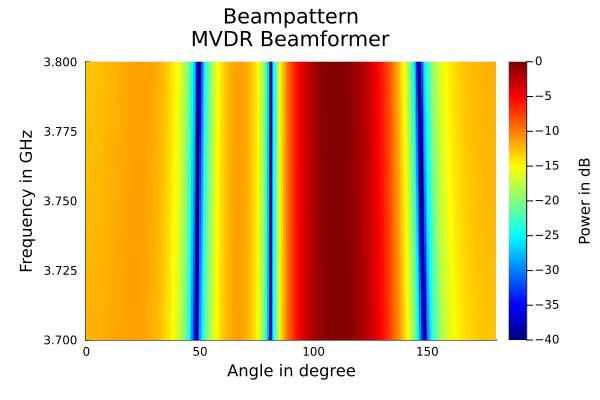

In [6]:
ϕaxis = LinRange(0, 180, 256)
A = steer.(Ref(pa), Ref(deg2rad.(ϕaxis)), faxis)
W = reduce(vcat, Ref(weights') .* A)
WdB = 20*log10.(abs.(W))


using Plots
import Measures
p1 = heatmap(ϕaxis, faxis/1e9, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nMVDR Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Angle in degree")
ylabel!("Frequency in GHz")

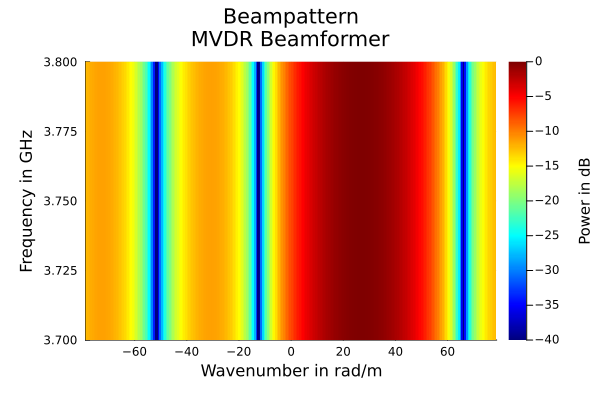

In [7]:
kxaxis = LinRange(-π/4e-2, π/4e-2, 256) # Nyquist theorem with k_s = 2π/4cm and k_s/2 = π/4cm
A = steer.(Ref(pa), Ref(kxaxis), faxis; coords=:WaveVec)
W = reduce(vcat, Ref(weights') .* A)
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(kxaxis, faxis/1e9, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nMVDR Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Wavenumber in rad/m")
ylabel!("Frequency in GHz")

Note how the beampattern is not pinched/stretched for changing frequencies when plotted over a wavenumber axis. 

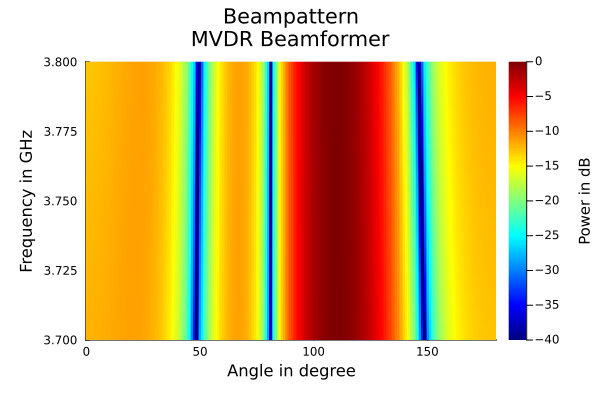

In [8]:
# we may even use CUDA.jl
using CUDA

pa = IsotropicArray(cu([-6e-2, -2e-2, 2e-2, 6e-2]))

# Use the array below to better see the behaviour
#pa = IsotropicArray(cu(collect(LinRange(-20e-2, 20e-2, 16))))

# Diagonal loading is applied by adding whitenoise to the correlation matrix
Snn = diffnoise(pa, 1e3, 3.75e9) + whitenoise(pa, 1e-2)
weights = mvdr_weights(pa, cu(Snn), cu([deg2rad(110)]), 3.75e9)
faxis = LinRange(3.7e9, 3.8e9, 1024)

ϕaxis = LinRange(0, 180, 256)
A = steer.(Ref(pa), Ref(cu(deg2rad.(collect(ϕaxis)))), faxis)
W = reduce(vcat, Ref(weights') .* A)
WdB = 20*log10.(abs.(W))


using Plots
import Measures
p1 = heatmap(ϕaxis, faxis/1e9, Array(WdB), cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nMVDR Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Angle in degree")
ylabel!("Frequency in GHz")